In [1]:
import pandas as pd
# Load the dataset
item = pd.read_csv("item.csv")
promotion = pd.read_csv("promotion.csv")
sales = pd.read_csv("sales.csv")
supermarkets = pd.read_csv("supermarkets.csv")

# item dataset

In [2]:
item.head()

,code,descrption,type,brand,size
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,Type 1,Aunt Jemima,2 LB
1,3000005070,A/JEM COMPLETE PANCAKE MI,Type 1,Aunt Jemima,32 OZ
2,3000005300,AJ BUTTERMILK PANCAKE MIX,Type 1,Aunt Jemima,32 OZ
3,3000005350,A J BTRMLK COMP PNCK MIX,Type 1,Aunt Jemima,1 LB
4,1600015760,BC PANCAKE MIX BUTTERMILK,Type 1,Bisquick,6.75 OZ


In [3]:
# Display the shape of the DataFrame (rows, columns)
item.shape

(927, 5)

In [4]:
#check null value
item.isnull().sum()

code          0
descrption    0
type          0
brand         0
size          0
dtype: int64

In [5]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   code        927 non-null    int64 
 1   descrption  927 non-null    object
 2   type        927 non-null    object
 3   brand       927 non-null    object
 4   size        927 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.3+ KB


# promotion dataset

In [6]:
promotion.head()

,code,supermarkets,week,feature,display,province
0,2700042240,285,91,Not on Feature,Mid-Aisle End Cap,2
1,2700042292,285,92,Interior Page Feature,Not on Display,2
2,2700042274,285,92,Interior Page Feature,Not on Display,2
3,2700042273,285,92,Interior Page Feature,Not on Display,2
4,2700042254,285,92,Interior Page Feature,Not on Display,2


In [7]:
# Display the shape of the DataFrame (rows, columns)
promotion.shape

(351372, 6)

In [8]:
#check null value
promotion.isnull().sum()

code            0
supermarkets    0
week            0
feature         0
display         0
province        0
dtype: int64

In [9]:
promotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351372 entries, 0 to 351371
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   code          351372 non-null  int64 
 1   supermarkets  351372 non-null  int64 
 2   week          351372 non-null  int64 
 3   feature       351372 non-null  object
 4   display       351372 non-null  object
 5   province      351372 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.1+ MB


# sales dataset

In [10]:
sales.head()

,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


In [11]:
# Display the shape of the DataFrame (rows, columns)
sales.shape

(1048575, 11)

In [12]:
#check null value
sales.isnull().sum()

code           0
amount         0
units          0
time           0
province       0
week           0
customerId     0
supermarket    0
basket         0
day            0
voucher        0
dtype: int64

In [13]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   code         1048575 non-null  int64  
 1   amount       1048575 non-null  float64
 2   units        1048575 non-null  int64  
 3   time         1048575 non-null  int64  
 4   province     1048575 non-null  int64  
 5   week         1048575 non-null  int64  
 6   customerId   1048575 non-null  int64  
 7   supermarket  1048575 non-null  int64  
 8   basket       1048575 non-null  int64  
 9   day          1048575 non-null  int64  
 10  voucher      1048575 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 88.0 MB


# supermarkets dataset

In [14]:
supermarkets.head()

,supermarket_No,postal-code
0,199,30319
1,200,30134
2,201,30066
3,202,31093
4,203,30542


In [15]:
# Display the shape of the DataFrame (rows, columns)
supermarkets.shape


(387, 2)

In [16]:
#check null value
supermarkets.isnull().sum()

supermarket_No    0
postal-code       0
dtype: int64

In [17]:
supermarkets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   supermarket_No  387 non-null    int64
 1   postal-code     387 non-null    int64
dtypes: int64(2)
memory usage: 6.2 KB


# Task 01

# Data Cleaning and Preparation

**merged datasets**

In [18]:
# Step 1: Merge Item with Sales on 'code'
sales_item_merged = pd.merge(sales, item, on='code', how='left')

# Step 2: Merge Promotion with Item on 'code'
promotion_item_merged = pd.merge(promotion, item, on='code', how='left')

# Step 3: Merge Promotion with Supermarkets on 'supermarkets' and 'supermarket_No'
promotion_supermarkets_merged = pd.merge(promotion, supermarkets, left_on='supermarkets', right_on='supermarket_No', how='left')

# Step 4: Merge Sales with Supermarkets on 'supermarket_No'
sales_supermarkets_merged = pd.merge(sales_item_merged, supermarkets, left_on='supermarket', right_on='supermarket_No', how='left')


In [19]:
# You can now explore or work with the merged datasets
sales_supermarkets_merged.head(2)

,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher,descrption,type,brand,size,supermarket_No,postal-code
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,Type 2,Barilla,16 OZ,244,40222
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,BERTOLLI TOM&BASIL SAUCE,Type 3,Bertolli,24 OZ,244,40222


In [20]:
print(sales_supermarkets_merged.columns)

Index(['code', 'amount', 'units', 'time', 'province', 'week', 'customerId',
       'supermarket', 'basket', 'day', 'voucher', 'descrption', 'type',
       'brand', 'size', 'supermarket_No', 'postal-code'],
      dtype='object')


In [21]:
sales_supermarkets_merged.shape

(1048575, 17)

In [22]:
#check null value
sales_supermarkets_merged.isnull().sum()

code              0
amount            0
units             0
time              0
province          0
week              0
customerId        0
supermarket       0
basket            0
day               0
voucher           0
descrption        0
type              0
brand             0
size              0
supermarket_No    0
postal-code       0
dtype: int64

No null value in this dataset 

# Business Insights

**Insight 1: Sales Distribution by Item Type**

In [23]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

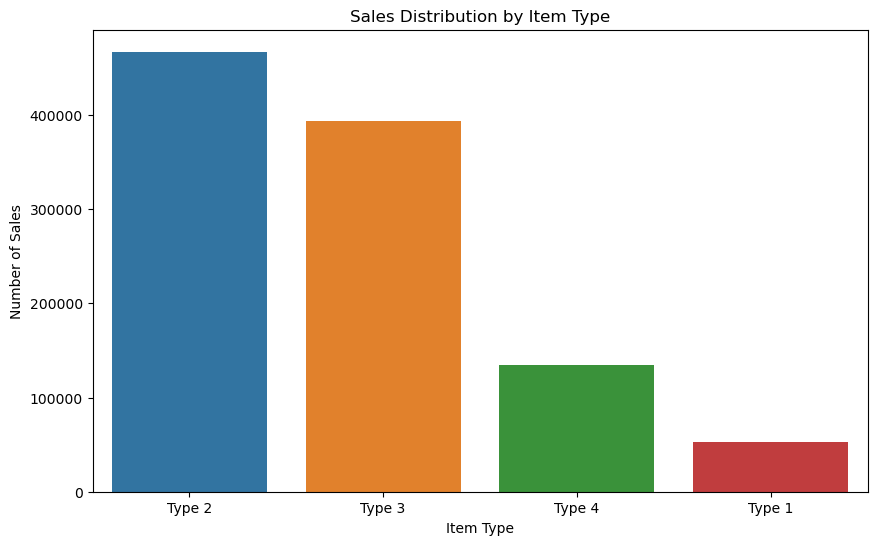

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales distribution by item type
plt.figure(figsize=(10, 6))
sns.countplot(data=sales_supermarkets_merged, x='type', order=sales_supermarkets_merged['type'].value_counts().index)
plt.title('Sales Distribution by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Number of Sales')
plt.show()

The chart shows how many items of each type are being sold. 

This helps businesses understand which item types are popular and which are not, helping plan stock and promotions better.

**Insight 2: Sales Trends over Time**

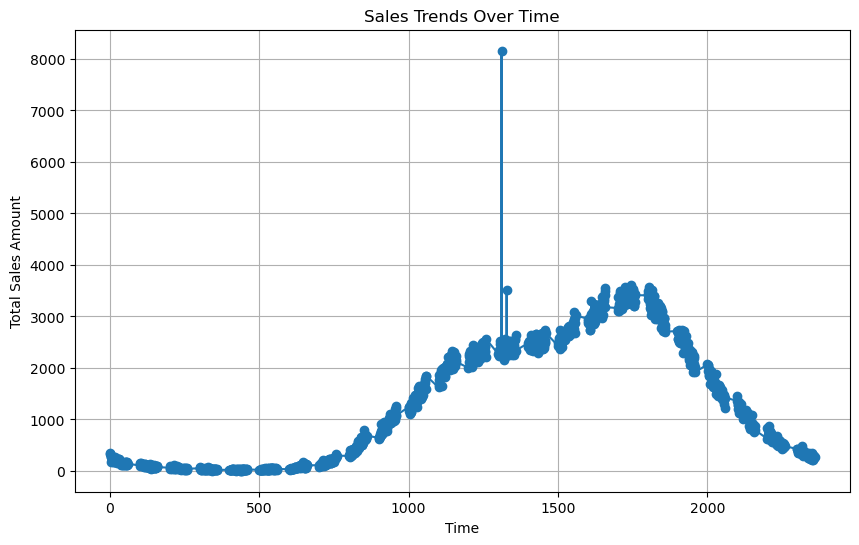

In [25]:
# Group by time and sum up the sales amount
sales_trends = sales_supermarkets_merged.groupby('time')['amount'].sum().reset_index()

# Plot sales trends over time
plt.figure(figsize=(10, 6))
plt.plot(sales_trends['time'], sales_trends['amount'], marker='o', linestyle='-')
plt.title('Sales Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()


This line graph shows the total sales over time, helping identify when sales are high or low. 

It can be used to spot seasonal trends or the impact of promotions on sales growth.

**Insight 3: Top Selling Brands**

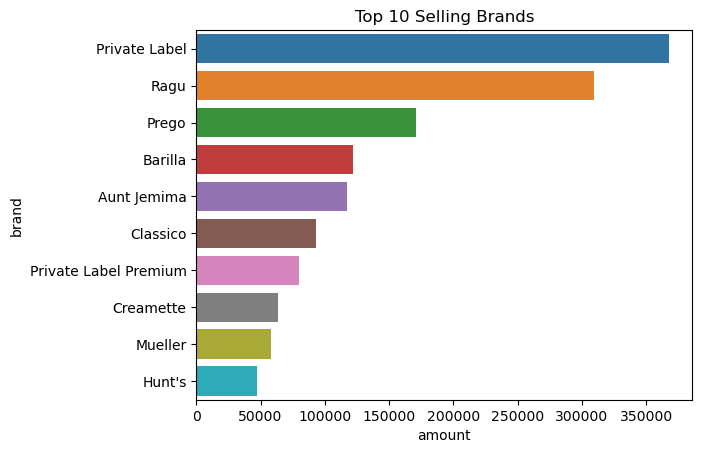

In [26]:
top_brands = sales_supermarkets_merged.groupby('brand')['amount'].sum().reset_index().sort_values(by='amount', ascending=False)
sns.barplot(x='amount', y='brand', data=top_brands.head(10))
plt.title('Top 10 Selling Brands')
plt.show()


Identifying the brands that generate the most sales helps businesses focus on stocking and promoting popular brands.


Insight: Some brands consistently outperform others, indicating customer preference. Prioritize these brands for better sales.

**Insight 4: Sales by Province**

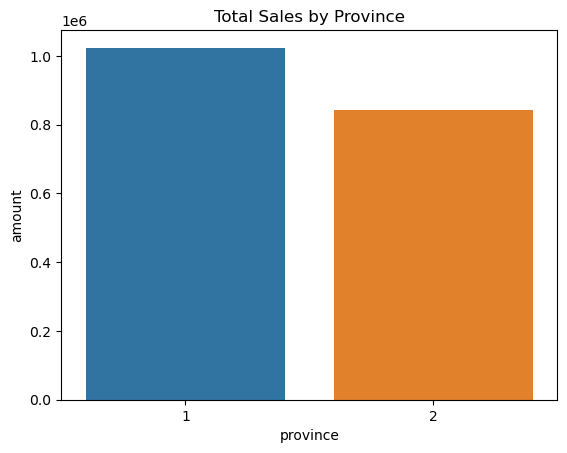

In [27]:
province_sales = sales_supermarkets_merged.groupby('province')['amount'].sum().reset_index()
sns.barplot(x='province', y='amount', data=province_sales)
plt.title('Total Sales by Province')
plt.show()


Understanding which provinces contribute the most to sales helps in regional marketing efforts.

Insight: Provinces with higher sales indicate key markets. Focus marketing and stock distribution in these regions.

**Insight 5: Voucher Usage Impact**

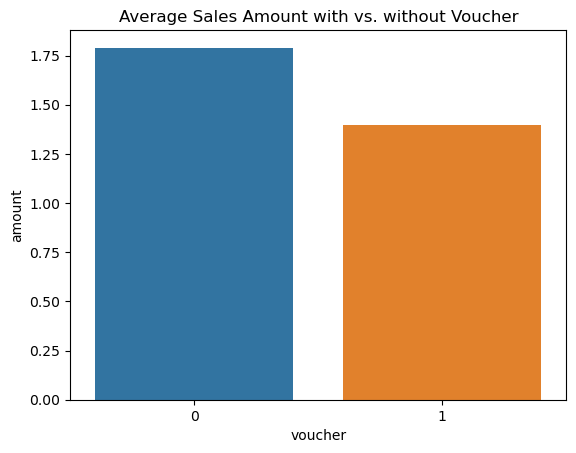

In [28]:
voucher_usage = sales_supermarkets_merged.groupby('voucher')['amount'].mean().reset_index()
sns.barplot(x='voucher', y='amount', data=voucher_usage)
plt.title('Average Sales Amount with vs. without Voucher')
plt.show()


Analyzing how vouchers impact customer spending.

Insight: Customers who use vouchers tend to spend more, suggesting voucher promotions are effective in increasing basket size.

# Task 02

# Define the Maze Environment

In [29]:
import numpy as np
import random

# Define the maze as a grid (0 = empty space, 1 = wall, 2 = goal)
maze = np.array([
    [0, 0, 0, 1, 0],
    [1, 0, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 2]  
])

# Define possible actions (up, down, left, right)
actions = ['up', 'down', 'left', 'right']

# Reward system: 1 point for reaching the goal, -1 for hitting a wall
def get_reward(state):
    x, y = state
    if maze[x, y] == 1:
        return -1  # Wall
    elif maze[x, y] == 2:
        return 1   # Goal
    else:
        return 0   # Empty space


# Define the Q-learning Algorithm

The agent will learn over time by updating its Q-values 

In [30]:
# Initialize Q-table with zeros (state-action table)
q_table = np.zeros((5, 5, len(actions)))

# Learning parameters
learning_rate = 0.8
discount_factor = 0.95
epsilon = 0.9  # Exploration rate

# Function to choose the next action (exploration vs. exploitation)
def choose_action(state):
    if random.uniform(0, 1) < epsilon:  # Explore
        return random.choice(actions)
    else:  # Exploit
        x, y = state
        return actions[np.argmax(q_table[x, y])]  # Best action based on Q-table

# Function to take action and move
def take_action(state, action):
    x, y = state
    if action == 'up' and x > 0:
        return (x - 1, y)
    elif action == 'down' and x < 4:
        return (x + 1, y)
    elif action == 'left' and y > 0:
        return (x, y - 1)
    elif action == 'right' and y < 4:
        return (x, y + 1)
    return state  # If the action hits the boundary, stay in place


# Train the Agent

The agent will explore the maze, learn the rewards, and improve over many episodes (trials).

In [31]:
# Train the agent for 1000 episodes
for episode in range(1000):
    # Reset agent position at the start of each episode
    state = (0, 0)  # Start at top-left corner
    
    for _ in range(50):  # Limit steps per episode
        action = choose_action(state)
        next_state = take_action(state, action)
        
        # Get reward for the next state
        reward = get_reward(next_state)
        
        # Update Q-value using Q-learning formula
        x, y = state
        next_x, next_y = next_state
        q_table[x, y, actions.index(action)] = q_table[x, y, actions.index(action)] + learning_rate * (
            reward + discount_factor * np.max(q_table[next_x, next_y]) - q_table[x, y, actions.index(action)]
        )
        
        # Move to the next state
        state = next_state
        
        # If goal is reached, break out of the loop
        if reward == 1:
            break


# Test the Agent

After training, test how well the agent navigates the maze.

In [32]:
# Test the trained agent
state = (0, 0)  # Start position
steps = 0
while state != (4, 4):  # Goal position
    action = choose_action(state)
    state = take_action(state, action)
    steps += 1
    print(f"Step {steps}: Agent moves {action}, new state: {state}")

print(f"Goal reached in {steps} steps!")


Step 1: Agent moves up, new state: (0, 0)
Step 2: Agent moves right, new state: (0, 1)
Step 3: Agent moves up, new state: (0, 1)
Step 4: Agent moves down, new state: (1, 1)
Step 5: Agent moves up, new state: (0, 1)
Step 6: Agent moves right, new state: (0, 2)
Step 7: Agent moves right, new state: (0, 3)
Step 8: Agent moves up, new state: (0, 3)
Step 9: Agent moves right, new state: (0, 4)
Step 10: Agent moves up, new state: (0, 4)
Step 11: Agent moves up, new state: (0, 4)
Step 12: Agent moves right, new state: (0, 4)
Step 13: Agent moves down, new state: (1, 4)
Step 14: Agent moves right, new state: (1, 4)
Step 15: Agent moves left, new state: (1, 3)
Step 16: Agent moves right, new state: (1, 4)
Step 17: Agent moves right, new state: (1, 4)
Step 18: Agent moves down, new state: (2, 4)
Step 19: Agent moves right, new state: (2, 4)
Step 20: Agent moves right, new state: (2, 4)
Step 21: Agent moves up, new state: (1, 4)
Step 22: Agent moves down, new state: (2, 4)
Step 23: Agent moves up

# task 01 continue..... Business Insights using ML 

we use  a Linear Regression model to predict sales amounts based on certain features in dataset.

This type of analysis can help in understanding factors influencing sales and generating actionable insights.



Mean Squared Error: 172.65074760068
R^2 Score: 0.0028911920943006653
                 Coefficient
units               0.939815
type_Type 2        -0.798970
type_Type 3         0.122060
type_Type 4         0.716776
supermarket_2       0.034886
...                      ...
supermarket_381     0.026740
supermarket_382    -0.004237
supermarket_383     0.267755
supermarket_384     0.038871
supermarket_385     0.004528

[379 rows x 1 columns]


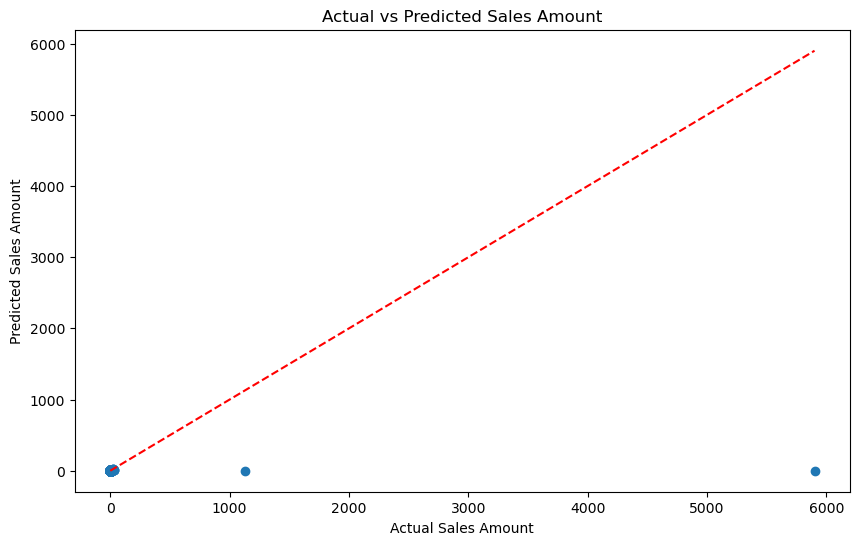

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the merged sales dataset
sales_data = sales_supermarkets_merged  

# Step 1: Prepare the data
# Select relevant features
features = sales_data[['units', 'type', 'supermarket']]
target = sales_data['amount']

# Step 2: One-hot encode categorical variables
features_encoded = pd.get_dummies(features, columns=['type', 'supermarket'], drop_first=True)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Step 4: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
predictions = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Step 7: Feature importance (coefficients)
coefficients = pd.DataFrame(model.coef_, features_encoded.columns, columns=['Coefficient'])
print(coefficients)

# Optional: Visualize predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Sales Amount')
plt.ylabel('Predicted Sales Amount')
plt.title('Actual vs Predicted Sales Amount')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.show()


**Output Summary**

MSE : 172.650

This number shows how far off the model's predictions are from the actual sales on average. 

R2 Score : 0.0028

This score indicates that the model explains only about 0.28% of the variability in sales. This suggests the model isn't very effective at predicting sales.


Coefficients :

Units Sold: Each additional unit sold increases sales by about $0.93.

Type 2 Item: Being of Type 2 reduces sales by about $0.79 compared to the baseline type.

Supermarkets: Each supermarket has its own effect on sales, showing how much more or less they sell.
